#Load the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('telco_churn_cleaned.csv')

2. Basic Churn Statistics
Check dataset shape and churn distribution:

(6891, 24)
Churn
0    5030
1    1861
Name: count, dtype: int64
Churn
0    0.729938
1    0.270062
Name: proportion, dtype: float64


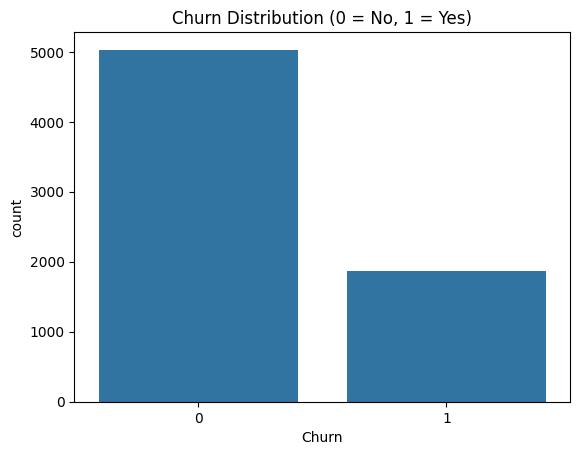

In [3]:
print(df.shape)
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))  # Percentage
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()

3. Univariate Analysis

a) Numeric Features

            tenure  MonthlyCharges  TotalCharges
count  6891.000000     6891.000000   6891.000000
mean     31.670730       63.793005   2168.314555
std      24.202622       29.548800   2138.273937
min       1.000000       18.250000     18.800000
25%       8.000000       34.825000    385.275000
50%      28.000000       70.000000   1354.400000
75%      54.000000       89.200000   3581.500000
max      72.000000      114.650000   7845.800000


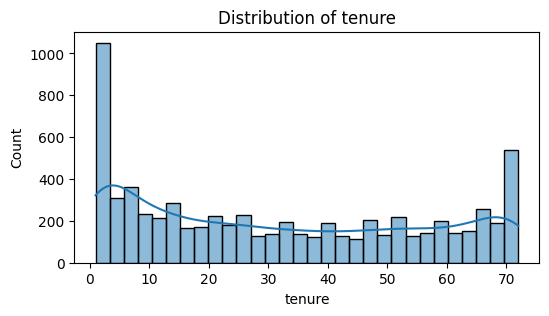

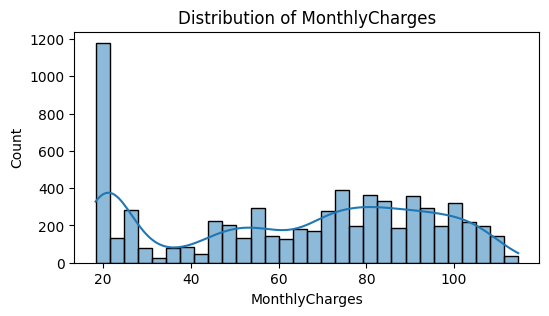

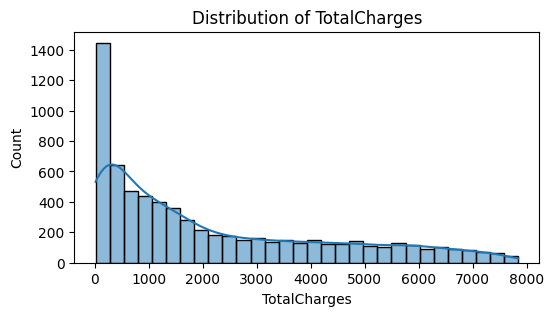

In [4]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[num_cols].describe())

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

b) Boolean/Categorical Features
(Based on your data, columns like gender_Male, SeniorCitizen_Yes, or Contract_Two year will be Boolean: 0/1 or TRUE/FALSE.)

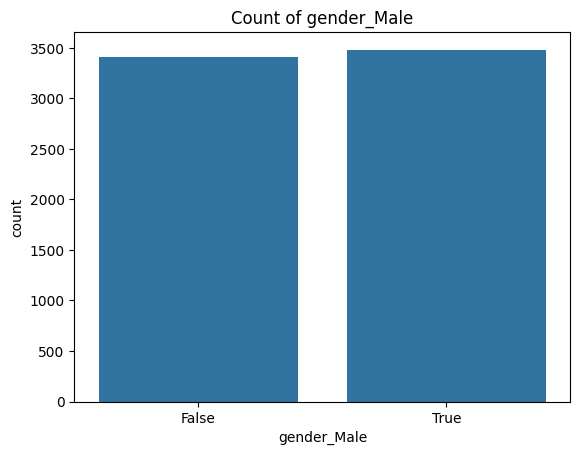

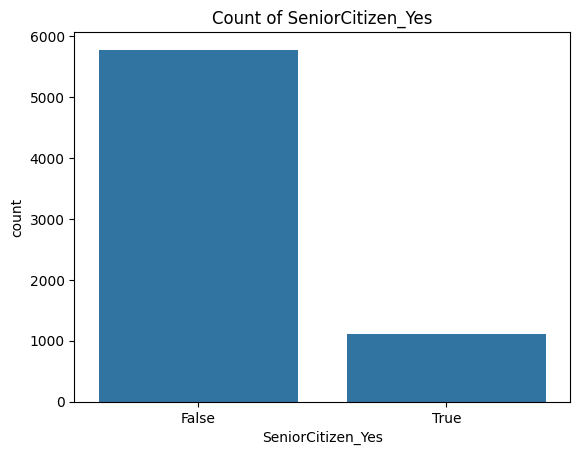

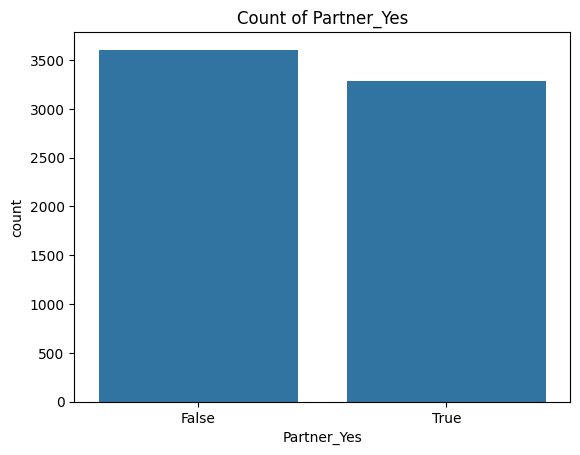

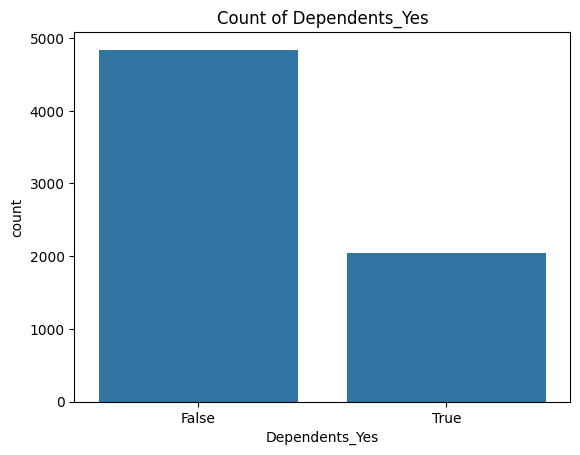

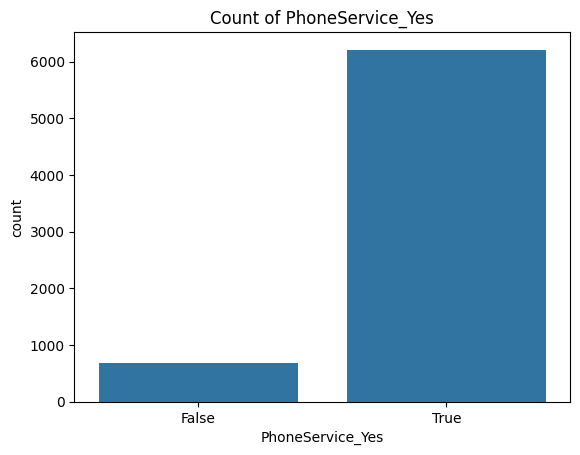

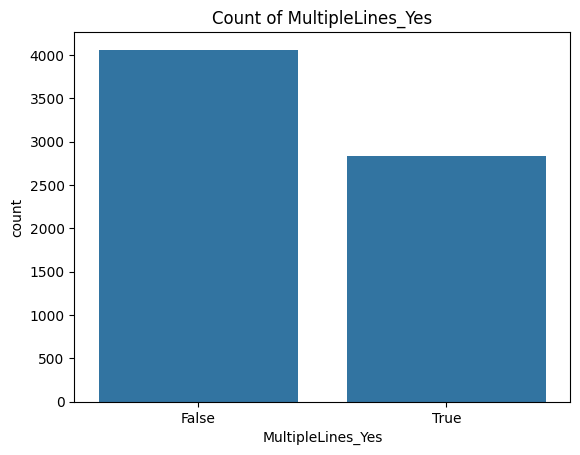

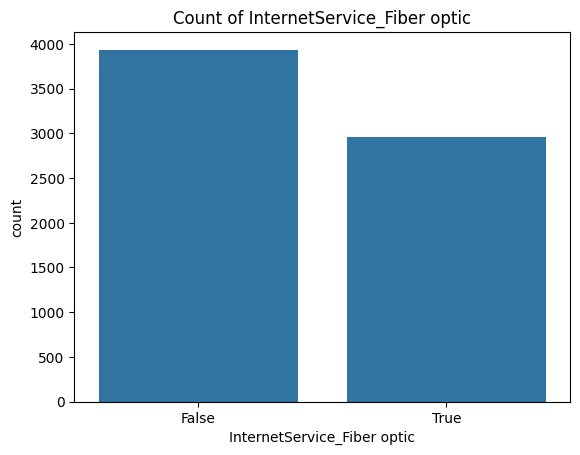

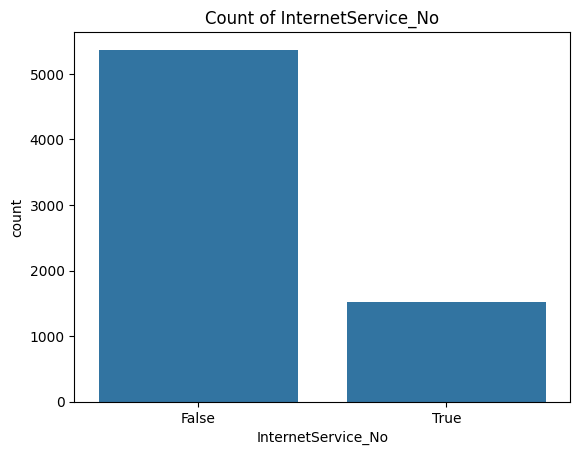

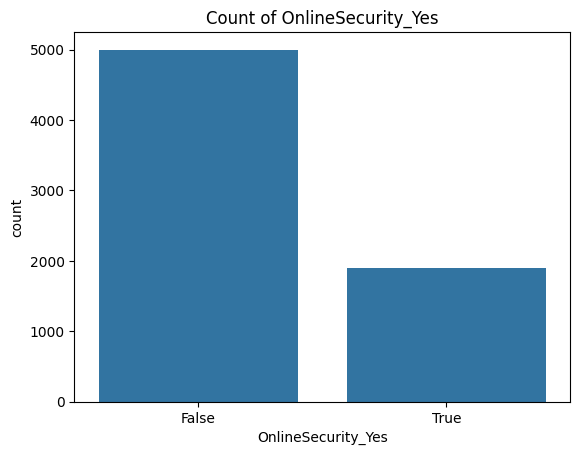

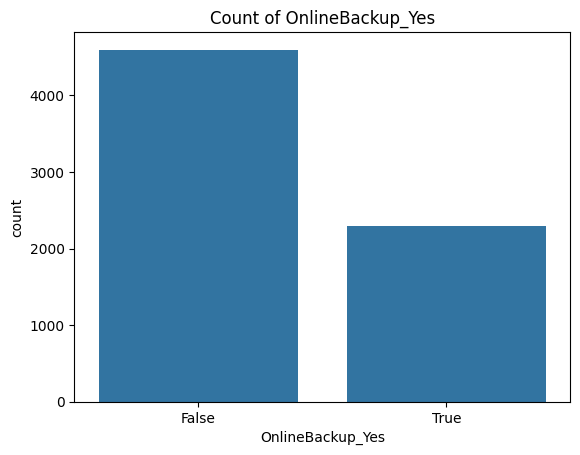

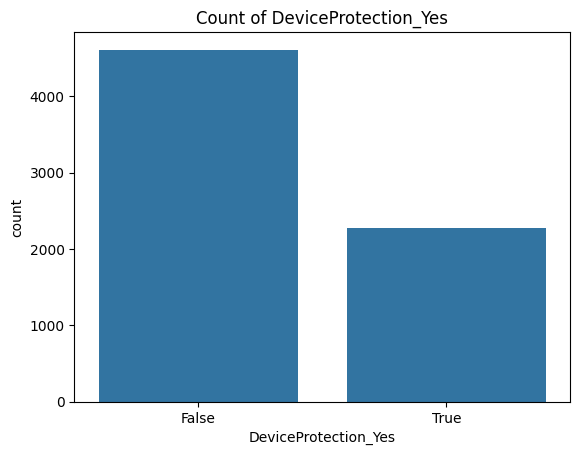

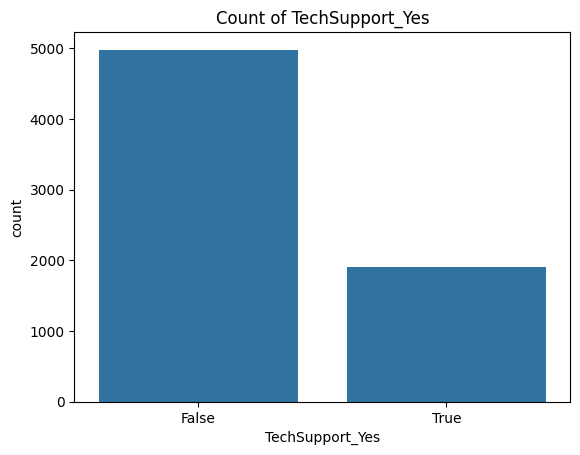

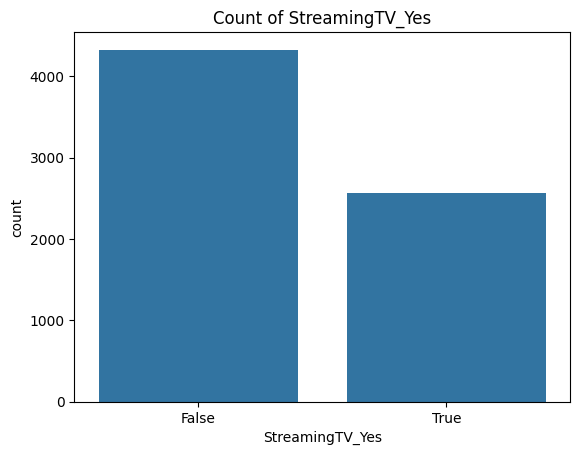

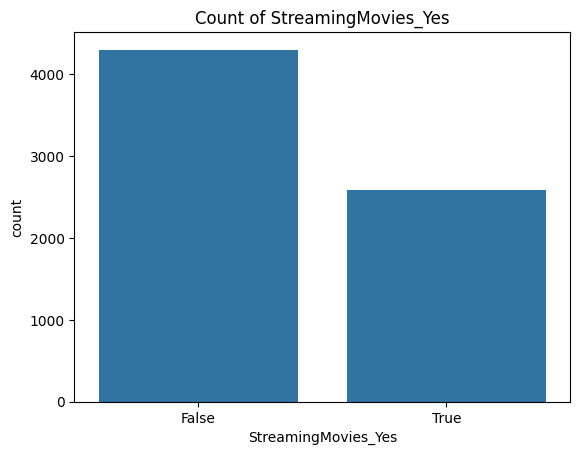

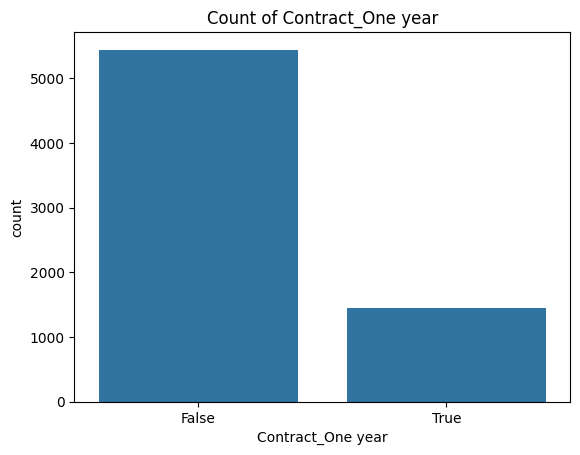

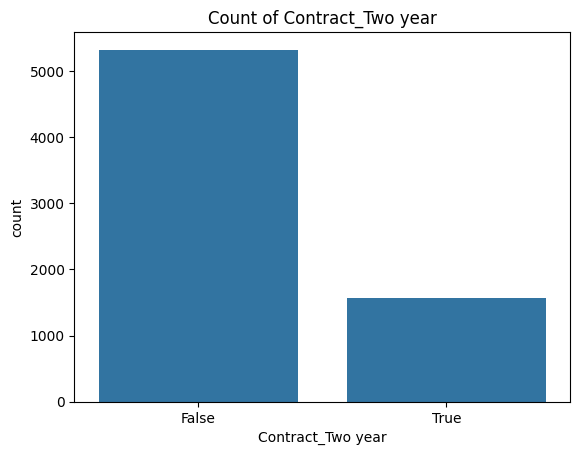

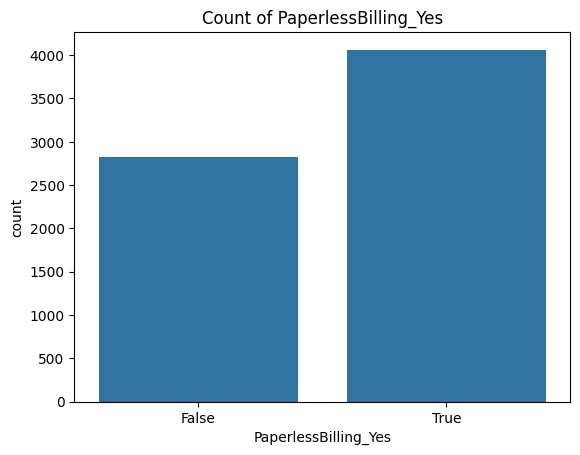

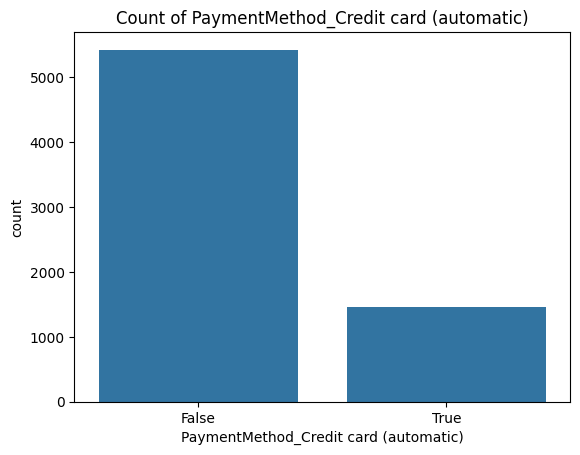

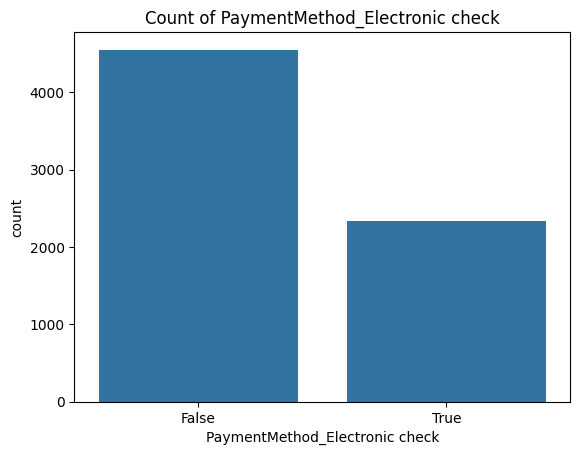

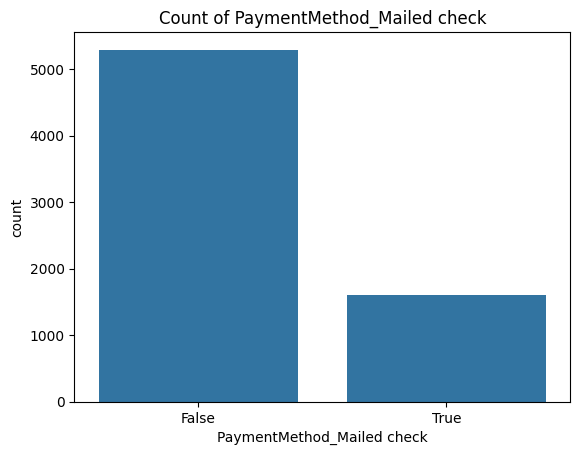

In [5]:
cat_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'Churn']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

4. Bivariate Analysis – Churn vs. Features

a) Numeric Features vs. Churn

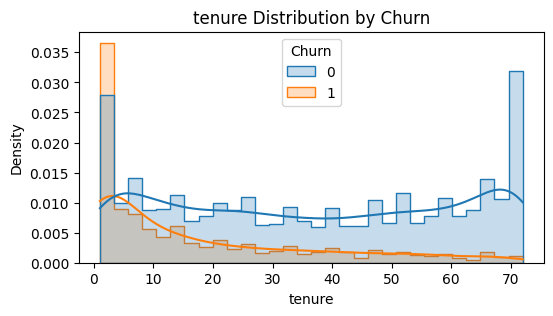

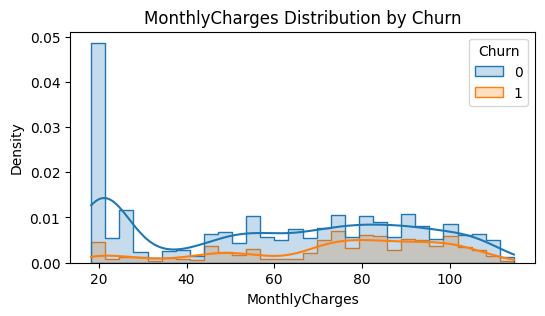

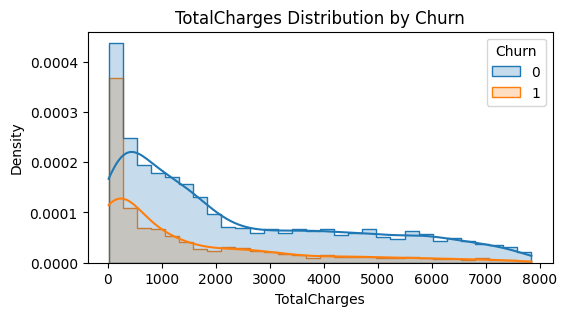

In [6]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, stat='density', element='step')
    plt.title(f'{col} Distribution by Churn')
    plt.show()

b) Boolean/Categorical Features vs. Churn

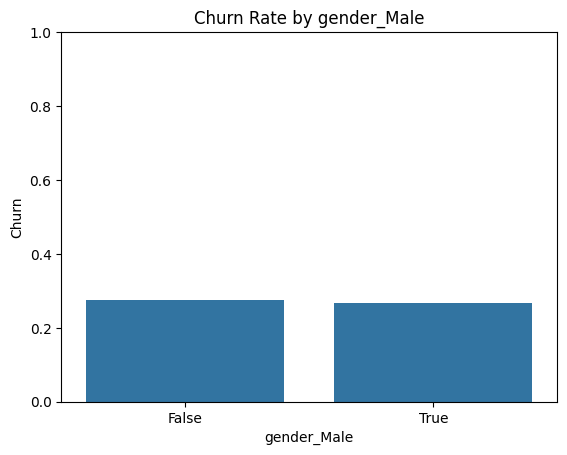

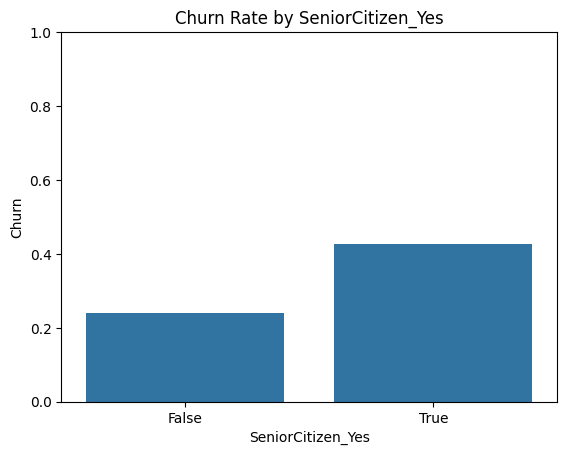

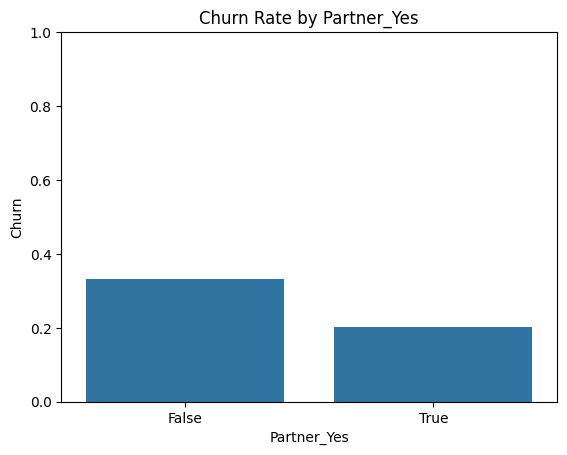

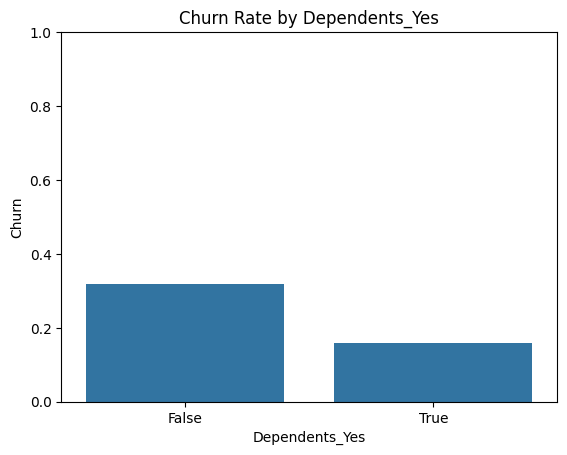

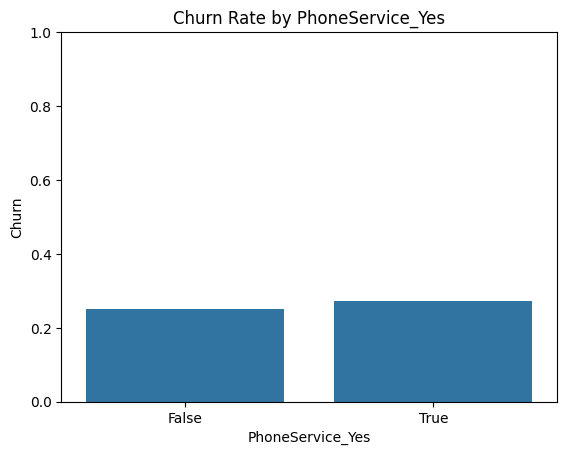

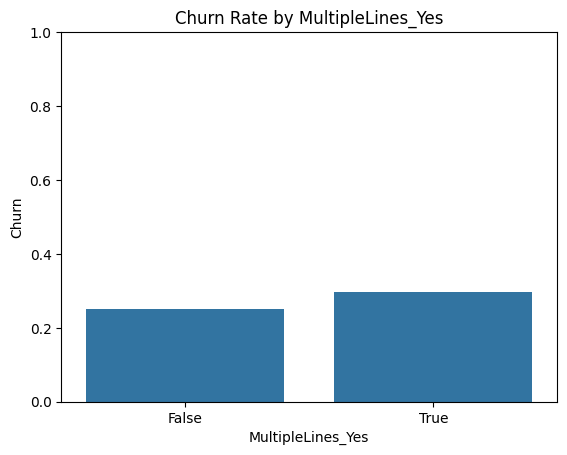

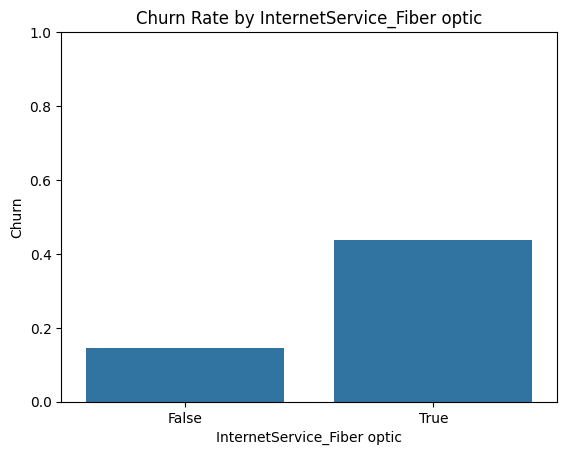

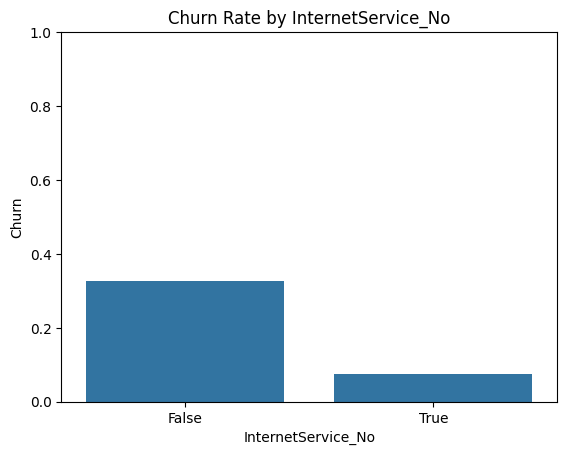

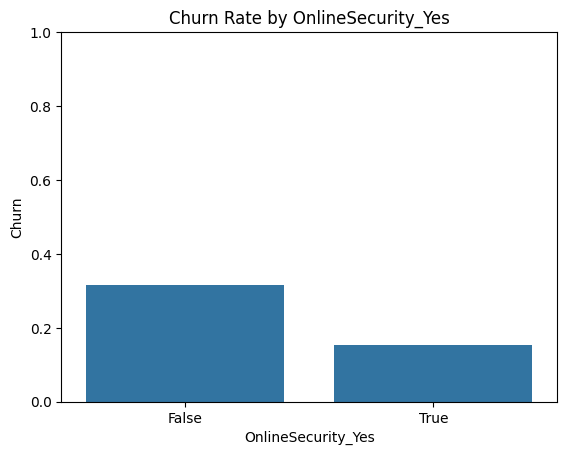

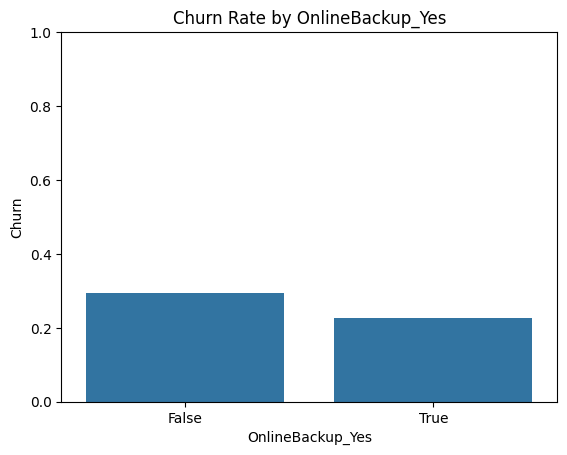

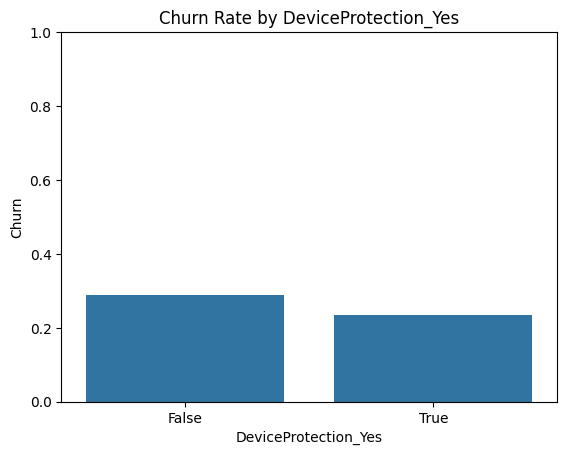

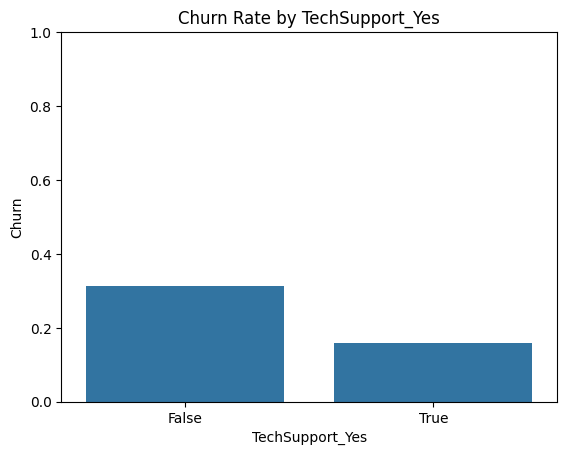

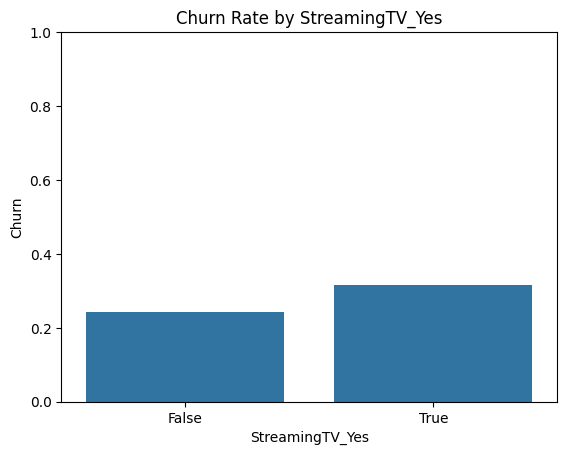

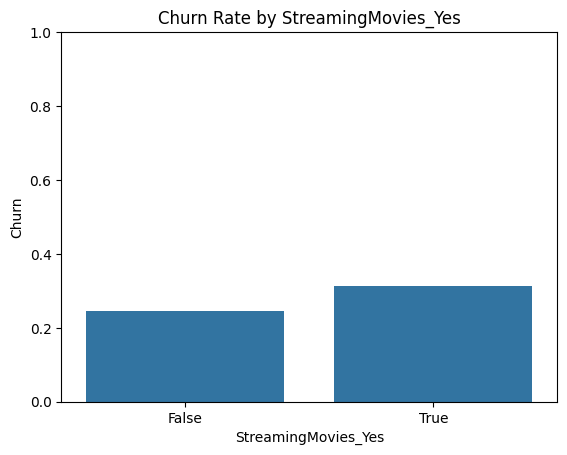

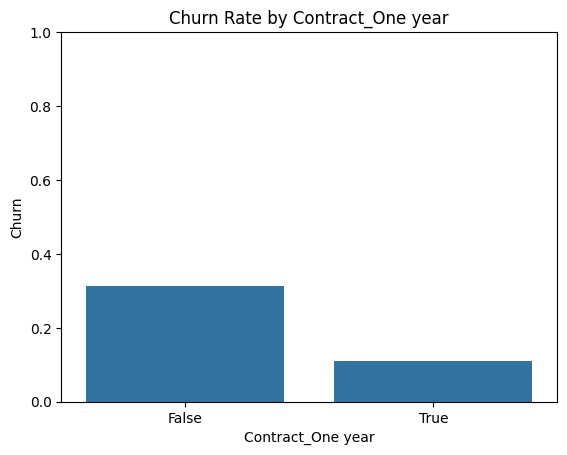

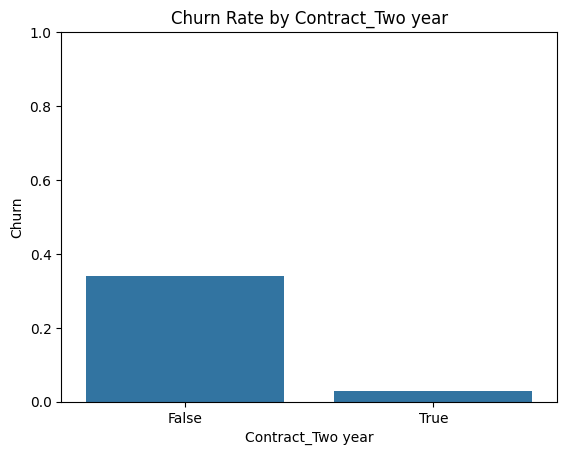

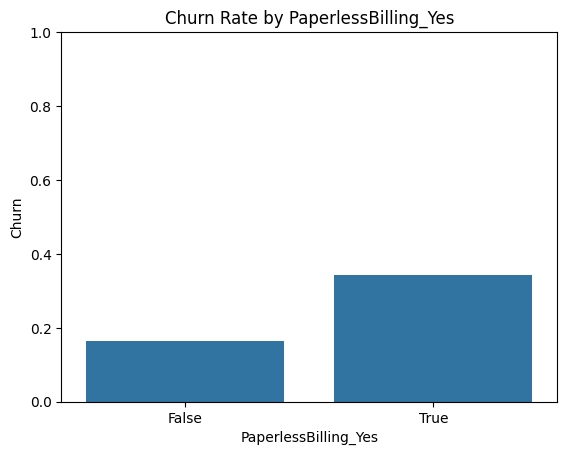

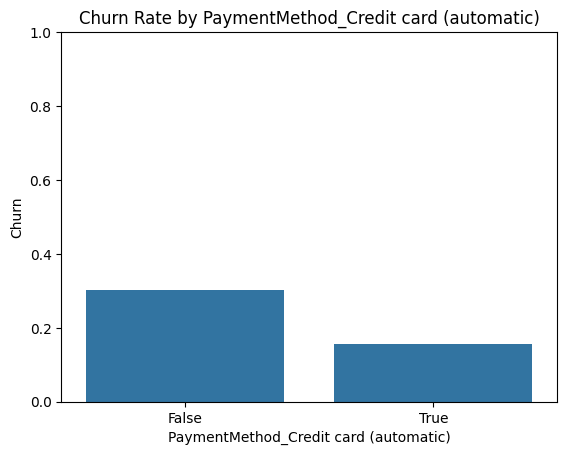

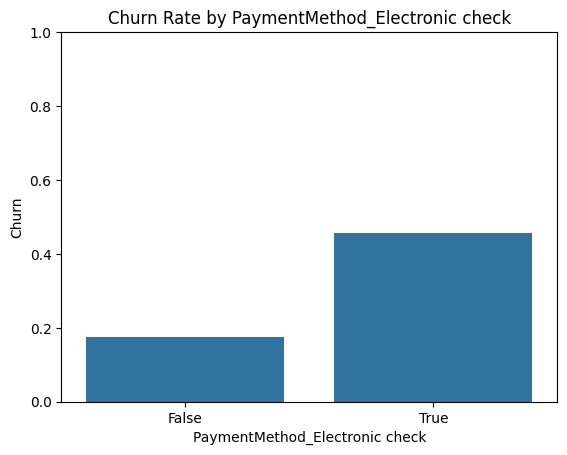

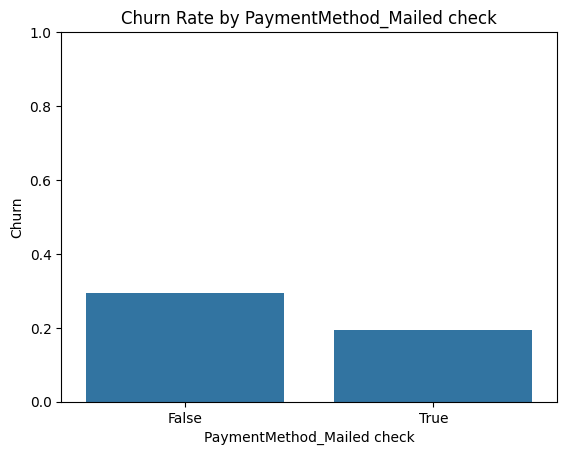

In [7]:
for col in cat_cols:
    churn_rates = df.groupby(col)['Churn'].mean().reset_index()
    sns.barplot(x=col, y='Churn', data=churn_rates)
    plt.title(f'Churn Rate by {col}')
    plt.ylim(0,1)
    plt.show()

5. Feature Correlation

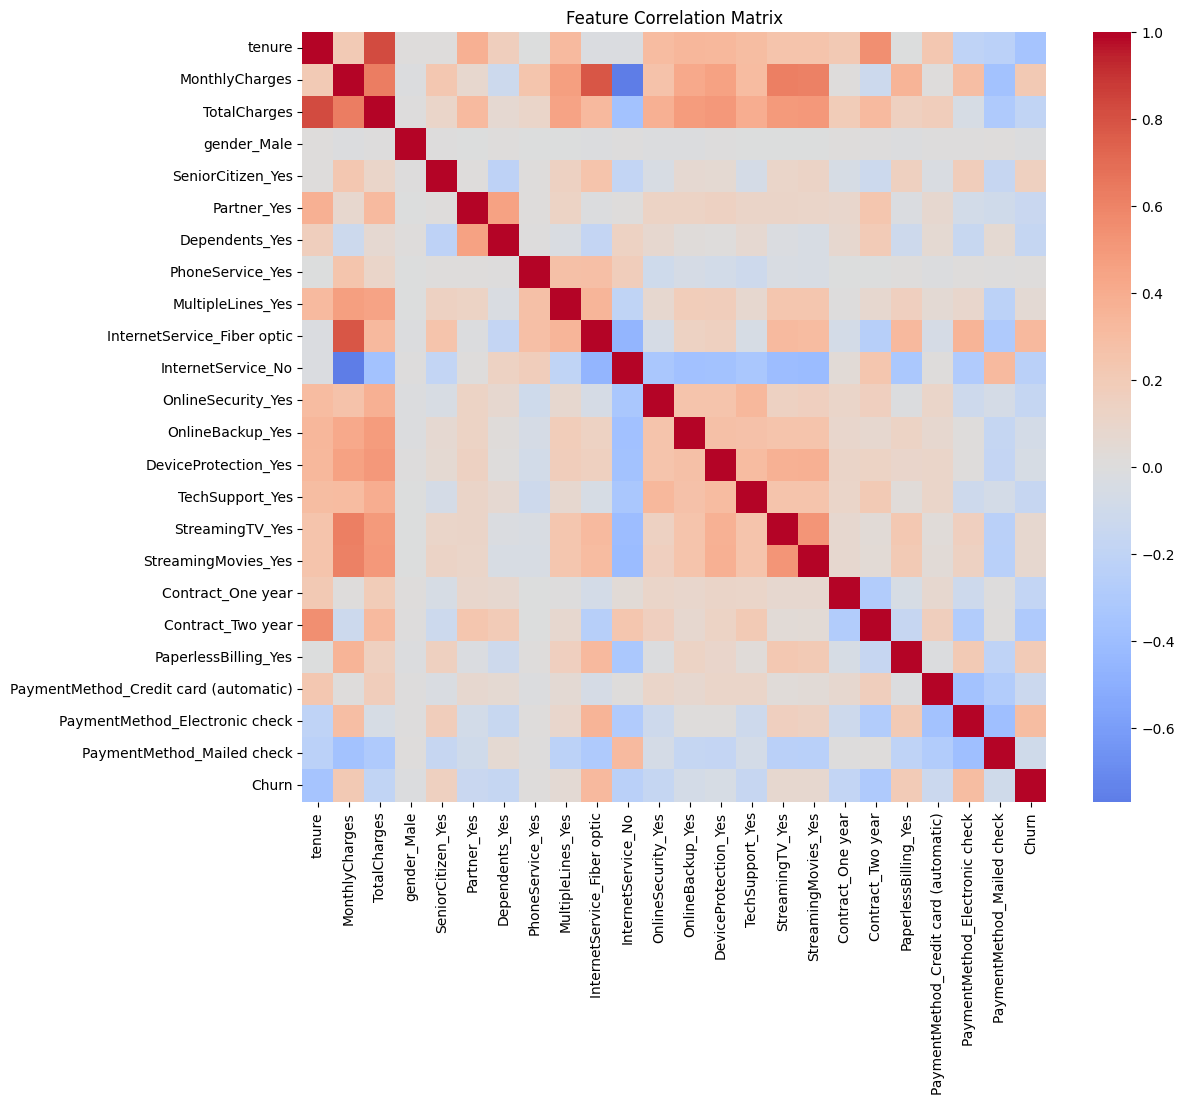

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()